In [1]:
#import necessary modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#importing the dataset
data=pd.read_csv('8.Insurance.csv')

#Setting to display all columns
pd.set_option('display.max_columns', None)

In [3]:
#see the data
data.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,25-01-2015,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,21-01-2015,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,22-02-2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,10-01-2015,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,17-02-2015,Vehicle Theft,?,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [4]:
data.shape

(1000, 40)

In [5]:
data.size

40000

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [7]:
#Dropping the columns
dfc=data.drop(['policy_number','insured_zip','auto_make','auto_model','auto_year','_c39','policy_csl'],axis=1)

In [8]:
dfc.columns

Index(['months_as_customer', 'age', 'policy_bind_date', 'policy_state',
       'policy_deductable', 'policy_annual_premium', 'umbrella_limit',
       'insured_sex', 'insured_education_level', 'insured_occupation',
       'insured_hobbies', 'insured_relationship', 'capital-gains',
       'capital-loss', 'incident_date', 'incident_type', 'collision_type',
       'incident_severity', 'authorities_contacted', 'incident_state',
       'incident_city', 'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'fraud_reported'],
      dtype='object')

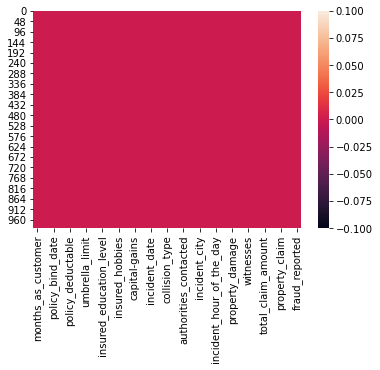

In [9]:
#Visualising null values
sns.heatmap(dfc.isnull())

C:\Users\Lucky Girish\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


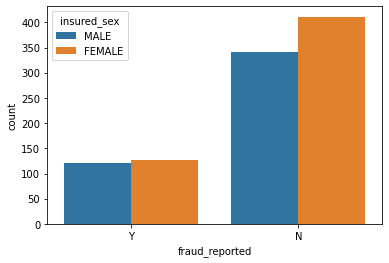

In [108]:
sns.countplot(data['fraud_reported'],hue=data['insured_sex'])

In [10]:
#Collision_type
dfc['collision_type'].nunique()

4

In [11]:
dfc['collision_type'].value_counts()

Rear Collision     292
Side Collision     276
Front Collision    254
?                  178
Name: collision_type, dtype: int64

C:\Users\Lucky Girish\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


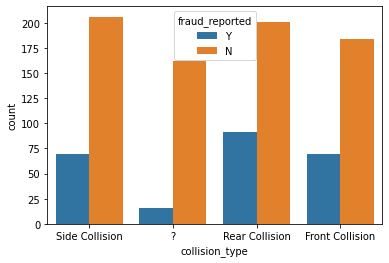

In [12]:
sns.countplot(dfc['collision_type'],hue=dfc['fraud_reported'])

finding the indexes where '?' is present, and new data frame to understand

In [13]:
repl=dfc[dfc['collision_type']=='?'].index.to_list()
repld=dfc.iloc[repl,[7,16,-1]]
repld

,insured_sex,collision_type,fraud_reported
1,MALE,?,Y
4,MALE,?,N
13,FEMALE,?,N
26,MALE,?,N
27,MALE,?,Y
...,...,...,...
964,FEMALE,?,Y
969,MALE,?,N
983,FEMALE,?,N
994,MALE,?,N


C:\Users\Lucky Girish\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


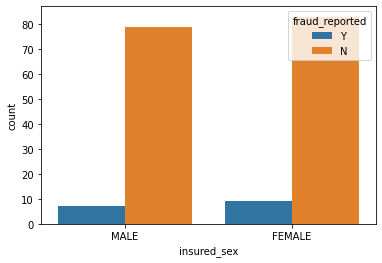

In [14]:
sns.countplot(repld['insured_sex'],hue=repld['fraud_reported'])

we can see , in this count of female and male commited frauds is lmost sme 

In [15]:
repld['fraud_reported'].value_counts()

N    162
Y     16
Name: fraud_reported, dtype: int64

10% of these commited fraud.

In [16]:
dfc['collision_type']=dfc['collision_type'].replace('?','Rear Collision')

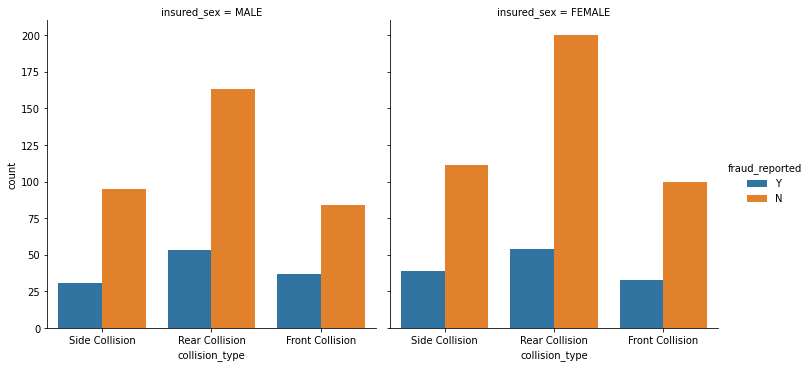

In [17]:
sns.catplot(x='collision_type', hue='fraud_reported',col='insured_sex',kind="count",data=dfc)

In [18]:
#Defining a custom function to check and plot graphs
def check(column):
    t=dfc[column].dtype
    plt.figure(figsize=(8,8))
    if t=='object':
        sns.countplot(y=column,hue='fraud_reported',data=dfc)
        print(f'no. of unique values in {column} is:',dfc[column].nunique())
        print(f'unique values in {column} is:',dfc[column].value_counts())
    else:
        print(f'Brief of {column}:',dfc[column].describe())
        sns.boxplot(y=column,x='fraud_reported',hue='insured_sex',data=dfc,palette="Set3")
        print('skewness:',dfc[column].skew())
        print(f'unique values count in {column}:',dfc[column].nunique())
    return

no. of unique values in insured_hobbies is: 20
unique values in insured_hobbies is: reading           64
paintball         57
exercise          57
bungie-jumping    56
golf              55
camping           55
movies            55
kayaking          54
yachting          53
hiking            52
video-games       50
skydiving         49
base-jumping      49
board-games       48
polo              47
chess             46
dancing           43
sleeping          41
cross-fit         35
basketball        34
Name: insured_hobbies, dtype: int64


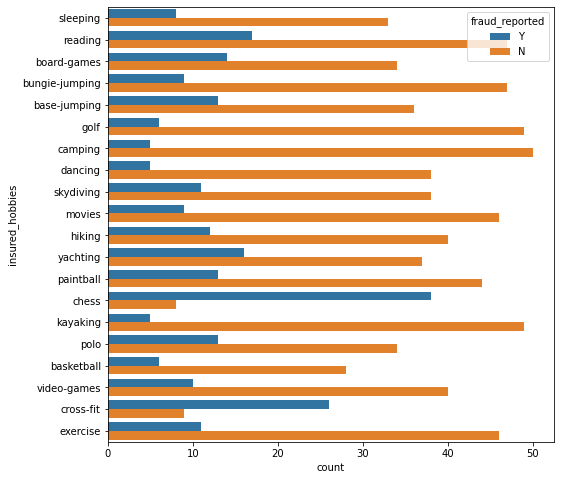

In [19]:
check('insured_hobbies')

people with hobby of chess, cross-fit ...made more frauds.

Brief of age: count    1000.000000
mean       38.948000
std         9.140287
min        19.000000
25%        32.000000
50%        38.000000
75%        44.000000
max        64.000000
Name: age, dtype: float64
skewness: 0.47898804709224163
unique values count in age: 46


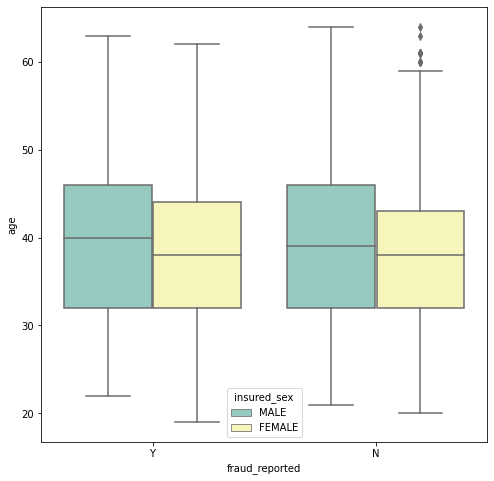

In [20]:
check('age')

Brief of months_as_customer: count    1000.000000
mean      203.954000
std       115.113174
min         0.000000
25%       115.750000
50%       199.500000
75%       276.250000
max       479.000000
Name: months_as_customer, dtype: float64
skewness: 0.3621768477780205
unique values count in months_as_customer: 391


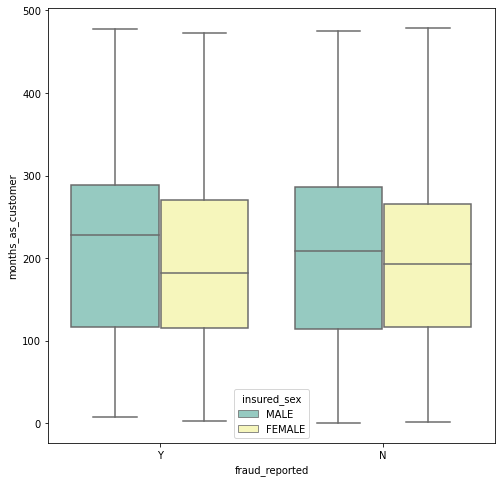

In [21]:
check('months_as_customer')

customers done fraud: 
    female : From 0 month of being customer
             75% of female clients who done fraud are approx less than 280 months 
    Male: 75% of male customers done fraud are less than 290 months as customer

C:\Users\Lucky Girish\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


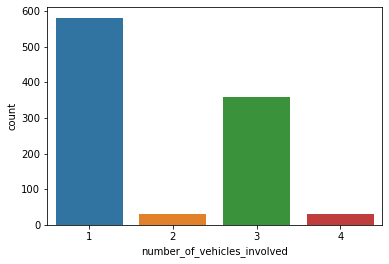

In [22]:
sns.countplot(dfc['number_of_vehicles_involved'])

no. of unique values in incident_severity is: 4
unique values in incident_severity is: Minor Damage      354
Total Loss        280
Major Damage      276
Trivial Damage     90
Name: incident_severity, dtype: int64


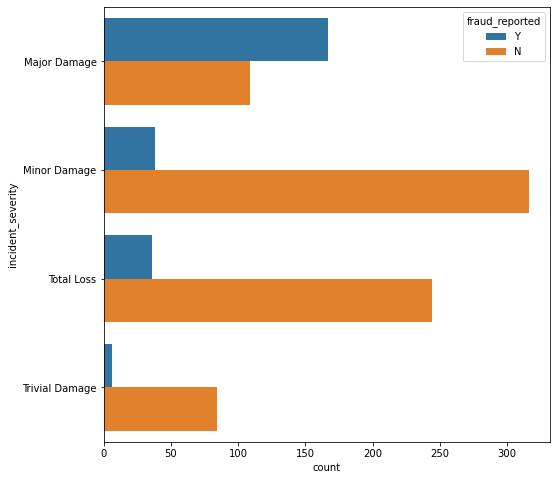

In [23]:
check('incident_severity')

no. of unique values in incident_city is: 7
unique values in incident_city is: Springfield    157
Arlington      152
Columbus       149
Northbend      145
Hillsdale      141
Riverwood      134
Northbrook     122
Name: incident_city, dtype: int64


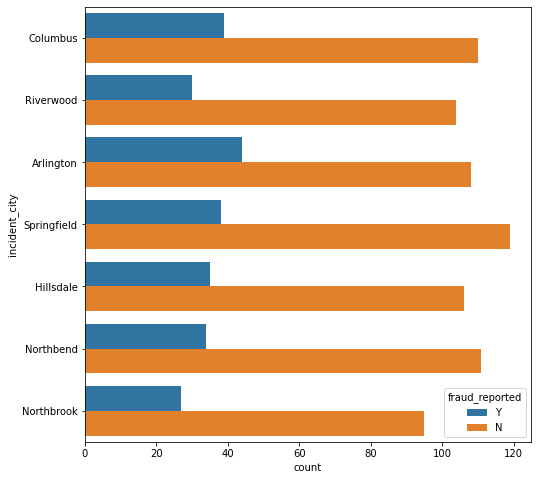

In [24]:
check('incident_city')

no. of unique values in incident_type is: 4
unique values in incident_type is: Multi-vehicle Collision     419
Single Vehicle Collision    403
Vehicle Theft                94
Parked Car                   84
Name: incident_type, dtype: int64


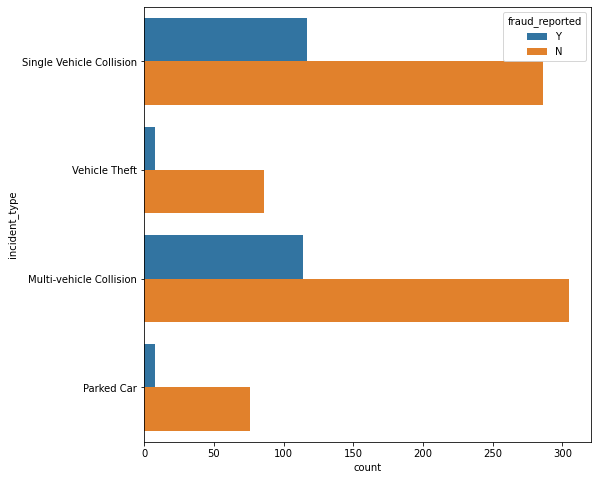

In [25]:
check('incident_type')

Brief of policy_annual_premium: count    1000.000000
mean     1256.406150
std       244.167395
min       433.330000
25%      1089.607500
50%      1257.200000
75%      1415.695000
max      2047.590000
Name: policy_annual_premium, dtype: float64
skewness: 0.004401994526610823
unique values count in policy_annual_premium: 991


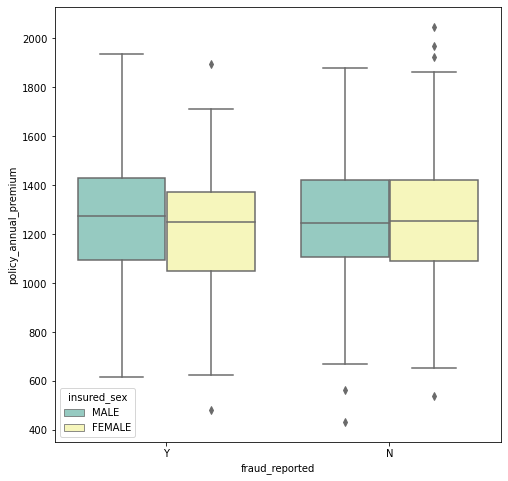

In [26]:
check('policy_annual_premium')

no. of unique values in insured_occupation is: 14
unique values in insured_occupation is: machine-op-inspct    93
prof-specialty       85
tech-support         78
exec-managerial      76
sales                76
craft-repair         74
transport-moving     72
other-service        71
priv-house-serv      71
armed-forces         69
adm-clerical         65
protective-serv      63
handlers-cleaners    54
farming-fishing      53
Name: insured_occupation, dtype: int64


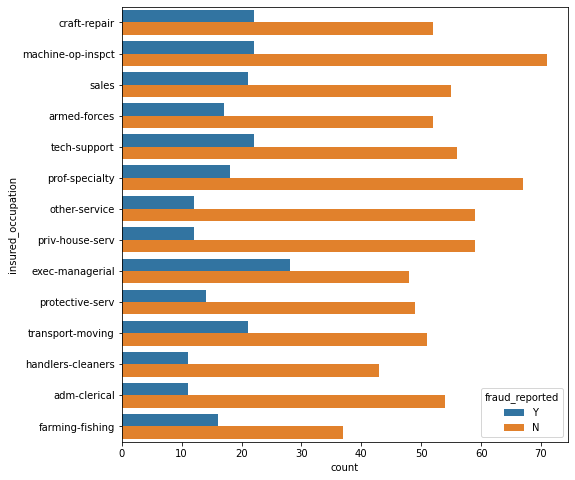

In [27]:
check('insured_occupation')

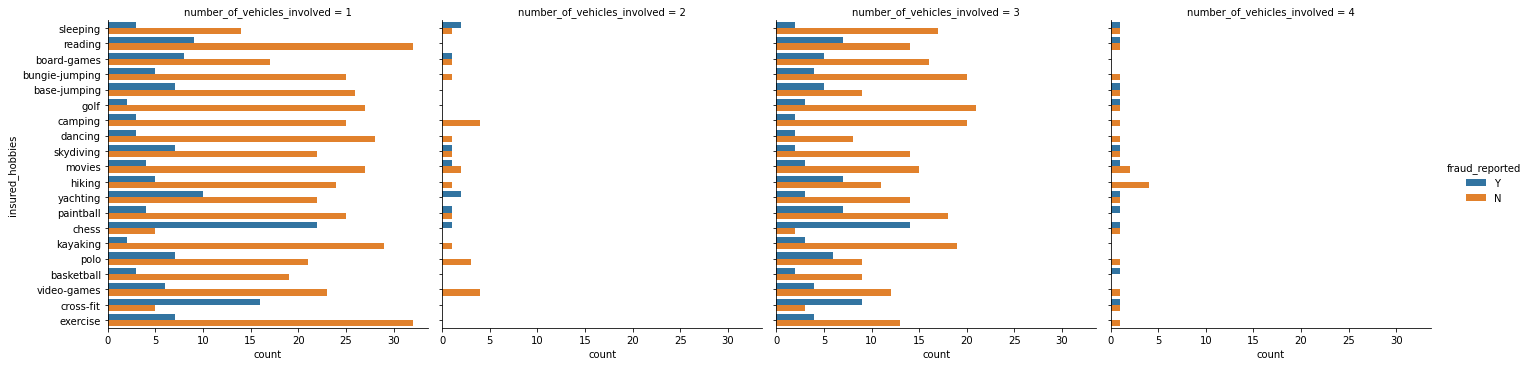

In [28]:
sns.catplot(y='insured_hobbies',hue='fraud_reported',col='number_of_vehicles_involved',data=dfc,kind='count')

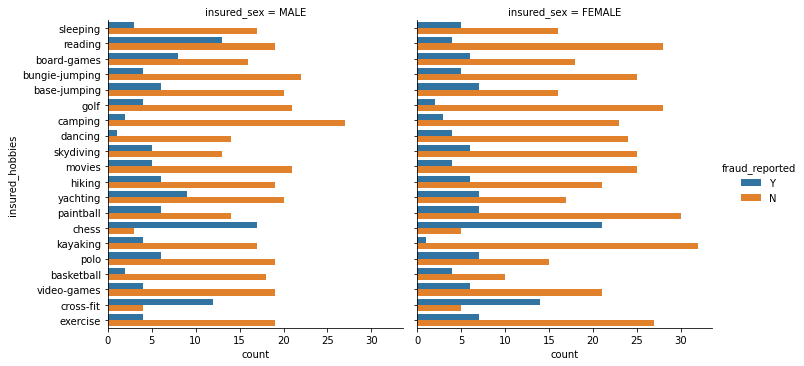

In [29]:
sns.catplot(y='insured_hobbies',hue='fraud_reported',col='insured_sex',data=dfc,kind='count')

no. of unique values in property_damage is: 3
unique values in property_damage is: ?      360
NO     338
YES    302
Name: property_damage, dtype: int64


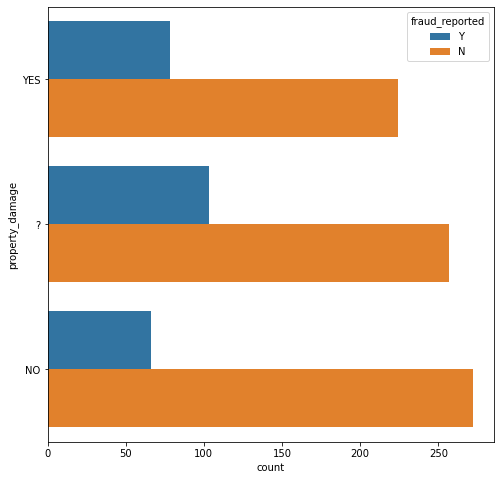

In [30]:
check('property_damage')

In [31]:
dfc['property_damage']=dfc['property_damage'].replace('?','YES')

In [32]:
dfc['police_report_available'].value_counts()

NO     343
?      343
YES    314
Name: police_report_available, dtype: int64

In [33]:
dfc['police_report_available']=dfc['police_report_available'].replace('?','NO')

no. of unique values in policy_bind_date is: 951
unique values in policy_bind_date is: 28-04-1992    3
05-08-1992    3
01-01-2006    3
07-11-1997    2
11-11-1998    2
             ..
28-04-1994    1
28-08-1998    1
11-03-1996    1
19-08-1995    1
02-10-2003    1
Name: policy_bind_date, Length: 951, dtype: int64


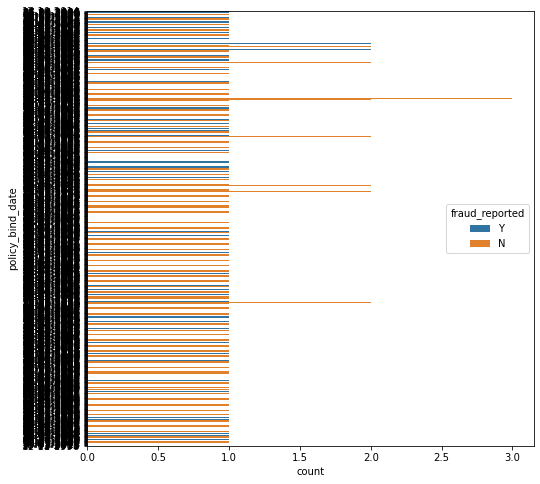

In [34]:
check('policy_bind_date')

It is very noisy,we can'tget insights. Let us extract only years from that column and drop the original column

In [35]:
dfc['policy_bind_year']=pd.to_datetime(dfc['policy_bind_date']).dt.year

In [36]:
dfc.drop('policy_bind_date',axis=1,inplace=True)

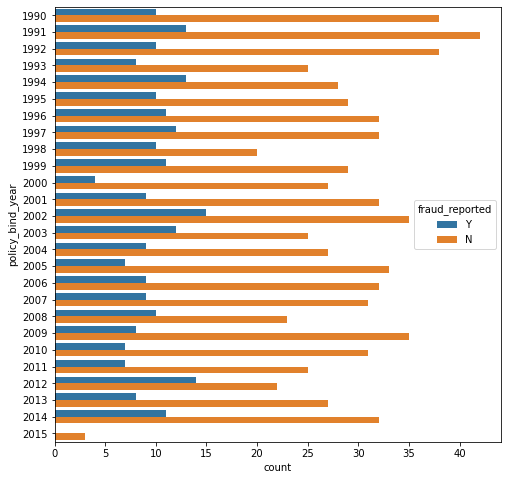

In [37]:
plt.figure(figsize=(8,8))
sns.countplot(y=dfc['policy_bind_year'],hue=dfc['fraud_reported'])

more fraud claims are made by the customers who insured in the years 1991,2002,2012. Let us make this column simple by subpracting year with the 2015.So we will get the no. of years old.

In [38]:
dfc['policy_bind_year']=2015-dfc['policy_bind_year']

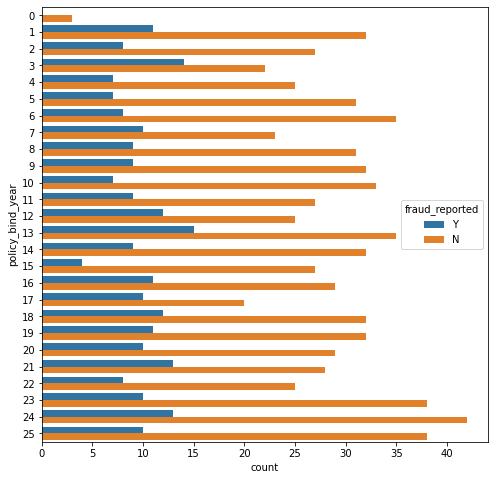

In [39]:
plt.figure(figsize=(8,8))
sns.countplot(y=dfc['policy_bind_year'],hue=dfc['fraud_reported'])

In [40]:
cols=[]
for i in dfc.columns:
    if dfc[i].dtypes=='object':
        cols.append(i)
cols

['policy_state',
 'insured_sex',
 'insured_education_level',
 'insured_occupation',
 'insured_hobbies',
 'insured_relationship',
 'incident_date',
 'incident_type',
 'collision_type',
 'incident_severity',
 'authorities_contacted',
 'incident_state',
 'incident_city',
 'incident_location',
 'property_damage',
 'police_report_available',
 'fraud_reported']

In [41]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in cols[:]:
    dfc[col]=le.fit_transform(dfc[col])
dfc.loc[:,cols]

,policy_state,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,property_damage,police_report_available,fraud_reported
0,2,1,4,2,17,0,49,2,2,0,4,4,1,996,1,1,1
1,1,1,4,6,15,2,41,3,1,1,4,5,5,628,1,0,1
2,2,0,6,11,2,3,44,0,1,1,4,1,1,685,0,0,0
3,0,0,6,1,2,4,19,2,0,0,4,2,0,669,1,0,1
4,0,1,0,11,2,4,34,3,1,1,2,1,0,220,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2,0,5,2,13,4,44,2,0,1,1,0,4,561,1,0,0
996,0,0,6,9,17,5,47,2,1,0,1,4,3,227,1,0,0
997,2,0,5,1,3,2,45,0,2,1,4,0,0,746,1,1,0
998,0,1,0,5,0,5,52,2,1,0,3,1,0,569,1,1,0


Now every column is encoded. We can drop the columns incident date, incident location, since those can be anything, that doesn't mean or give any info.
We have state and city info, so no need of address, also we find they are 1000 locations

In [42]:
dfc.drop(['incident_date','incident_location'],axis=1,inplace=True)

In [43]:
dfc.columns

Index(['months_as_customer', 'age', 'policy_state', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_hour_of_the_day', 'number_of_vehicles_involved',
       'property_damage', 'bodily_injuries', 'witnesses',
       'police_report_available', 'total_claim_amount', 'injury_claim',
       'property_claim', 'vehicle_claim', 'fraud_reported',
       'policy_bind_year'],
      dtype='object')

In [44]:
dfc.skew()

months_as_customer             0.362177
age                            0.478988
policy_state                  -0.026177
policy_deductable              0.477887
policy_annual_premium          0.004402
umbrella_limit                 1.806712
insured_sex                    0.148630
insured_education_level       -0.000148
insured_occupation            -0.058881
insured_hobbies               -0.061563
insured_relationship           0.077488
capital-gains                  0.478850
capital-loss                  -0.391472
incident_type                  0.101507
collision_type                -0.033682
incident_severity              0.279016
authorities_contacted         -0.121744
incident_state                -0.148865
incident_city                  0.049531
incident_hour_of_the_day      -0.035584
number_of_vehicles_involved    0.502664
property_damage               -0.685977
bodily_injuries                0.014777
witnesses                      0.019636
police_report_available        0.802728


C:\Users\Lucky Girish\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\Lucky Girish\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


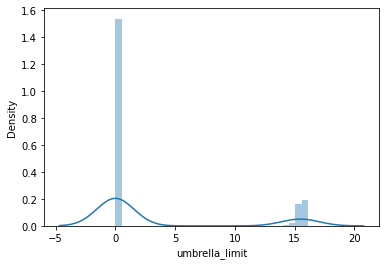

In [45]:
dfc['umbrella_limit']=np.log(dfc['umbrella_limit']+1)
sns.distplot(dfc['umbrella_limit'])

In [46]:
dfc['umbrella_limit'].skew()

1.4944987932625282

skewness reduced

C:\Users\Lucky Girish\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


0.5330084731063726

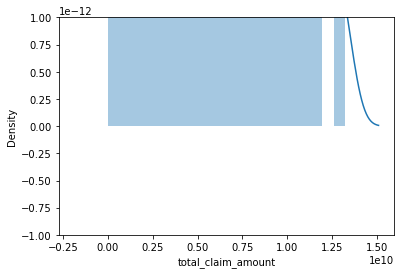

In [47]:
dfc['total_claim_amount']=np.square(dfc['total_claim_amount'])
sns.distplot(dfc['total_claim_amount'])
dfc['total_claim_amount'].skew()

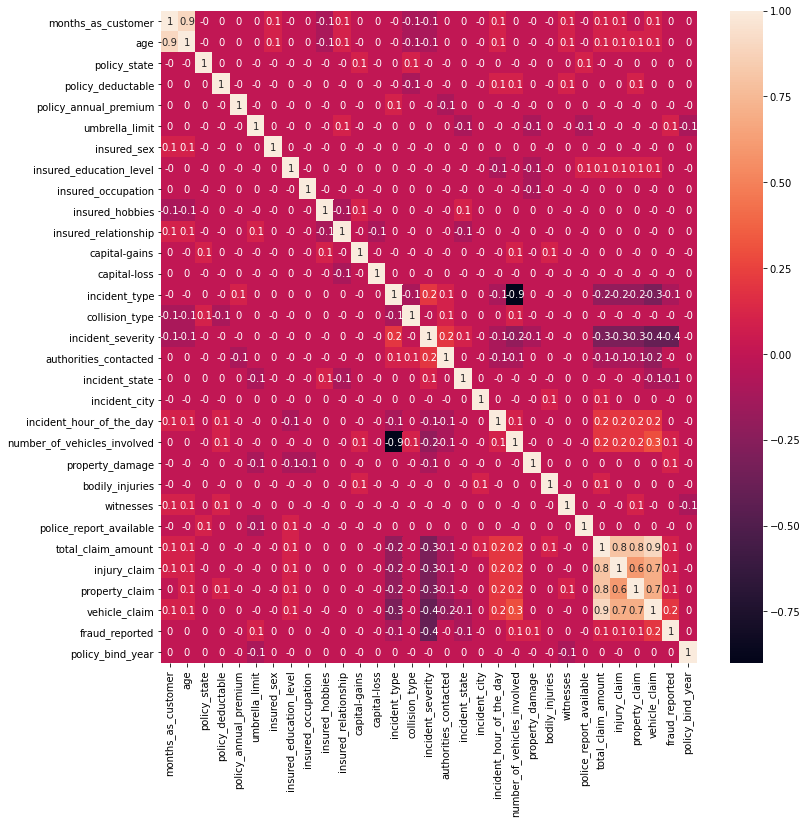

In [48]:
plt.figure(figsize=(12,12))
cor=round(dfc.corr(),1)
sns.heatmap(cor,annot=True)

In [49]:
dfc.drop(['age','incident_hour_of_the_day','injury_claim','property_claim','vehicle_claim'],axis=1,inplace=True)

In [50]:
from scipy import stats
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(x):
    vif=pd.DataFrame()
    vif['variables']=x.columns
    vif['vif factor']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    return(vif)

In [51]:
dfc.dropna(inplace=True)

In [52]:
calc_vif(dfc)

,variables,vif factor
0,months_as_customer,4.180330
1,policy_state,2.506335
2,policy_deductable,4.451835
3,policy_annual_premium,21.529027
4,umbrella_limit,1.292254
5,insured_sex,1.895181
6,insured_education_level,3.320101
7,insured_occupation,3.664761
8,insured_hobbies,3.985819
9,insured_relationship,3.089837


there is high multicolinearity in columns policy_annual_premium, number of vehicles involved.we require these columns, so we will drop the columns, policy deductable, number of vehicles involved

In [53]:
dfc.drop(['number_of_vehicles_involved','policy_deductable'],axis=1,inplace=True)

In [54]:
calc_vif(dfc)

,variables,vif factor
0,months_as_customer,4.107113
1,policy_state,2.494736
2,policy_annual_premium,17.565383
3,umbrella_limit,1.289438
4,insured_sex,1.876866
5,insured_education_level,3.257709
6,insured_occupation,3.629742
7,insured_hobbies,3.856024
8,insured_relationship,3.069920
9,capital-gains,1.837321


also capital gain, capital loss - is related to company, which is not required ,one will check their own benefit will not think how much amount they are gonna make loss to company.So we can drop those.

In [55]:
dfc.drop(['capital-gains','capital-loss'],axis=1,inplace=True)

In [56]:
#Let us split the columns x & y
x=dfc.drop('fraud_reported',axis=1)
y=dfc['fraud_reported']

In [58]:
#Scaling the dataset
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_scaled=sc.fit_transform(x)

In [59]:
from imblearn.over_sampling import SMOTE
smt=SMOTE()
x_balanced,y_balanced=smt.fit_resample(x_scaled,y)

In [60]:
#Let us import and split x y at best random state
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.model_selection import train_test_split

lo=LogisticRegression()
rs=0
acsc=0

for i in range(1000):
    x_train,x_test,y_train,y_test=train_test_split(x_balanced,y_balanced,test_size=0.2,random_state=i)
    lo.fit(x_train,y_train)
    pred=lo.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>acsc:
        acsc=acc
        rs=i
print(f'Best score:{acsc}\n random state: {rs}')

Best score:0.813953488372093
 random state: 832


In [61]:
x_train,x_test,y_train,y_test=train_test_split(x_balanced,y_balanced,test_size=0.2,random_state=832)

In [62]:
#importing other models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
models=[LogisticRegression(),SVC(),DecisionTreeClassifier(),RandomForestClassifier(),GradientBoostingClassifier(),KNeighborsClassifier()]
for m in models:
    m.fit(x_train,y_train)
    predm=m.predict(x_test)
    print(f'{m}:')
    print('accuracy score:',accuracy_score(y_test,predm))
    print('confusion matrix:\n',confusion_matrix(y_test,predm))
    print('classification report:\n',classification_report(y_test,predm))
    cvscore=cross_val_score(m,x_balanced,y_balanced,cv=5)
    print('mean cv score:',cvscore.mean())
    print('\n')

LogisticRegression():
accuracy score: 0.813953488372093
confusion matrix:
 [[122  28]
 [ 28 123]]
classification report:
               precision    recall  f1-score   support

           0       0.81      0.81      0.81       150
           1       0.81      0.81      0.81       151

    accuracy                           0.81       301
   macro avg       0.81      0.81      0.81       301
weighted avg       0.81      0.81      0.81       301

mean cv score: 0.7453621262458472


SVC():
accuracy score: 0.8870431893687708
confusion matrix:
 [[129  21]
 [ 13 138]]
classification report:
               precision    recall  f1-score   support

           0       0.91      0.86      0.88       150
           1       0.87      0.91      0.89       151

    accuracy                           0.89       301
   macro avg       0.89      0.89      0.89       301
weighted avg       0.89      0.89      0.89       301

mean cv score: 0.845767441860465


DecisionTreeClassifier():
accuracy score: 0.8

In [85]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
pred=dtc.predict(x_test)
print('Metrics of GradientBoostingClassifier:')
print('Score:',accuracy_score(y_test,pred))
print('Confusion Matrix:',confusion_matrix(y_test,pred))
print('Classification Report:',classification_report(y_test,pred))

Metrics of GradientBoostingClassifier:
Score: 0.8504983388704319
Confusion Matrix: [[127  23]
 [ 22 129]]
Classification Report:               precision    recall  f1-score   support

           0       0.85      0.85      0.85       150
           1       0.85      0.85      0.85       151

    accuracy                           0.85       301
   macro avg       0.85      0.85      0.85       301
weighted avg       0.85      0.85      0.85       301



In [86]:
from sklearn.model_selection import GridSearchCV
diff_para={'criterion':['gini', 'entropy'],'splitter':['best','random'],'random_state':[10,20,30,40,50,60,70]}
grid=GridSearchCV(estimator=dtc,param_grid=diff_para)
grid.fit(x_train,y_train)
print('Best Score:',grid.best_score_)
print('Best Estimator:',grid.best_estimator_)
print('Best Parameter:',grid.best_params_)

Best Score: 0.8395539419087136
Best Estimator: DecisionTreeClassifier(criterion='entropy', random_state=60)
Best Parameter: {'criterion': 'entropy', 'random_state': 60, 'splitter': 'best'}


In [92]:
dtc=DecisionTreeClassifier(criterion='entropy', random_state=60,splitter='best')
dtc.fit(x_train,y_train)
pred=dtc.predict(x_test)
print('Metrics of GradientBoostingClassifier:')
print('Score:',accuracy_score(y_test,pred))
print('Confusion Matrix:',confusion_matrix(y_test,pred))
print('Classification Report:',classification_report(y_test,pred))

Metrics of GradientBoostingClassifier:
Score: 0.867109634551495
Confusion Matrix: [[131  19]
 [ 21 130]]
Classification Report:               precision    recall  f1-score   support

           0       0.86      0.87      0.87       150
           1       0.87      0.86      0.87       151

    accuracy                           0.87       301
   macro avg       0.87      0.87      0.87       301
weighted avg       0.87      0.87      0.87       301



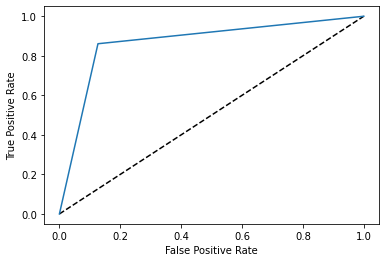

Score: 0.867130242825607


In [93]:
#Auc Roc curve

from sklearn.metrics import roc_auc_score
#Predicting the probability of having 0 in the x-test
y_pred_prob=dtc.predict_proba(x_test)[:,1]
y_pred_prob

#Visualising
from sklearn.metrics import roc_curve
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)

plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='KNeighborsClassifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()
auc_score=roc_auc_score(y_test,dtc.predict(x_test))
print('Score:',auc_score)

In [ ]:
We can see the accuracy increased from 85 to 87% by tuning the decision Tree Classifier

In [68]:
gc=GradientBoostingClassifier()
gc.fit(x_train,y_train)
predr=gc.predict(x_test)
print('Metrics of GradientBoostingClassifier:')
print('Score:',accuracy_score(y_test,predr))
print('Confusion Matrix:',confusion_matrix(y_test,predr))
print('Classification Report:',classification_report(y_test,predr))


Metrics of GradientBoostingClassifier:
Score: 0.9136212624584718
Confusion Matrix: [[133  17]
 [  9 142]]
Classification Report:               precision    recall  f1-score   support

           0       0.94      0.89      0.91       150
           1       0.89      0.94      0.92       151

    accuracy                           0.91       301
   macro avg       0.91      0.91      0.91       301
weighted avg       0.91      0.91      0.91       301



In [71]:
#Tuning the model
par={'n_estimators':[100,200,500],'random_state':[18],'init':['estimator','zero']
    ,'max_features':['auto','sqrt','log2'],'max_leaf_nodes':range(0,20,5)}
grid=GridSearchCV(gc,param_grid=par,cv=5,verbose=2)
grid.fit(x_train,y_train)
print('score: ',grid.best_score_)
print('best estimators:',grid.best_estimator_)
print('best parameters:',grid.best_params_)


Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV] END init=estimator, max_features=auto, max_leaf_nodes=0, n_estimators=100, random_state=18; total time=   0.0s
[CV] END init=estimator, max_features=auto, max_leaf_nodes=0, n_estimators=100, random_state=18; total time=   0.0s
[CV] END init=estimator, max_features=auto, max_leaf_nodes=0, n_estimators=100, random_state=18; total time=   0.0s
[CV] END init=estimator, max_features=auto, max_leaf_nodes=0, n_estimators=100, random_state=18; total time=   0.0s
[CV] END init=estimator, max_features=auto, max_leaf_nodes=0, n_estimators=100, random_state=18; total time=   0.0s
[CV] END init=estimator, max_features=auto, max_leaf_nodes=0, n_estimators=200, random_state=18; total time=   0.0s
[CV] END init=estimator, max_features=auto, max_leaf_nodes=0, n_estimators=200, random_state=18; total time=   0.0s
[CV] END init=estimator, max_features=auto, max_leaf_nodes=0, n_estimators=200, random_state=18; total time=   0.0s
[CV] END i

C:\Users\Lucky Girish\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
225 fits failed out of a total of 360.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
180 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Lucky Girish\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Lucky Girish\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 525, in fit
    self._check_params()
  File "C:\Users\Lucky Girish\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 324, in _check_params
    raise ValueError(
ValueError: The init parameter mus

score:  0.8861272475795297
best estimators: GradientBoostingClassifier(init='zero', max_features='auto', max_leaf_nodes=10,
                           random_state=18)
best parameters: {'init': 'zero', 'max_features': 'auto', 'max_leaf_nodes': 10, 'n_estimators': 100, 'random_state': 18}


In [84]:
gc=GradientBoostingClassifier(init='zero', max_features='auto', max_leaf_nodes=10,n_estimators=100,
                           random_state=832)
gc.fit(x_train,y_train)
predr=gc.predict(x_test)
print('Metrics of GradientBoostingClassifier:')
print('Score:',accuracy_score(y_test,predr))
print('Confusion Matrix:',confusion_matrix(y_test,predr))
print('Classification Report:',classification_report(y_test,predr))

Metrics of GradientBoostingClassifier:
Score: 0.9136212624584718
Confusion Matrix: [[133  17]
 [  9 142]]
Classification Report:               precision    recall  f1-score   support

           0       0.94      0.89      0.91       150
           1       0.89      0.94      0.92       151

    accuracy                           0.91       301
   macro avg       0.91      0.91      0.91       301
weighted avg       0.91      0.91      0.91       301



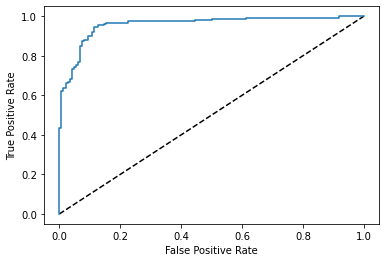

Score: 0.9135320088300221


In [94]:
#Auc Roc curve

from sklearn.metrics import roc_auc_score
#Predicting the probability of having 0 in the x-test
y_pred_prob=gc.predict_proba(x_test)[:,1]
y_pred_prob

#Visualising
from sklearn.metrics import roc_curve
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)

plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='KNeighborsClassifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()
auc_score=roc_auc_score(y_test,gc.predict(x_test))
print('Score:',auc_score)

In [95]:
import joblib
joblib.dump(gc,'Auto_Insurance_Fraud.csv')

['Auto_Insurance_Fraud.csv']